# Combined and Explained Python Script for Iris & Stock Data Projects

# Show the Data

In [1]:
import pandas as pd
df = pd.read_csv(r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\1) iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 1. Data Cleaning and EDA (Iris Dataset)

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the Dataset
df = pd.read_csv(r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\1) iris.csv")

# Handle Missing Values
print("🔹 Missing Values Before:")
print(df.isnull().sum())

num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df['species'] = df['species'].fillna(df['species'].mode()[0])

print("\n🔹 Missing Values After:")
print(df.isnull().sum())

# Remove Duplicates & Standardize Categorical Format
df.drop_duplicates(inplace=True)
df['species'] = df['species'].astype(str).str.strip().str.lower()

# Data Summary
print("\n🔹 Data Info:")
df.info()
print("\n🔹 Summary Statistics:\n", df.describe())
print("\n🔹 Median:\n", df.median(numeric_only=True))
print("\n🔹 Mode:\n", df.mode(numeric_only=True).iloc[0])
print("\n🔹 Standard Deviation:\n", df.std(numeric_only=True))

🔹 Missing Values Before:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

🔹 Missing Values After:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB

🔹 Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.3

# 2. Visualizations (Histograms, Boxplots, Correlation, Scatter, Bar, Line)

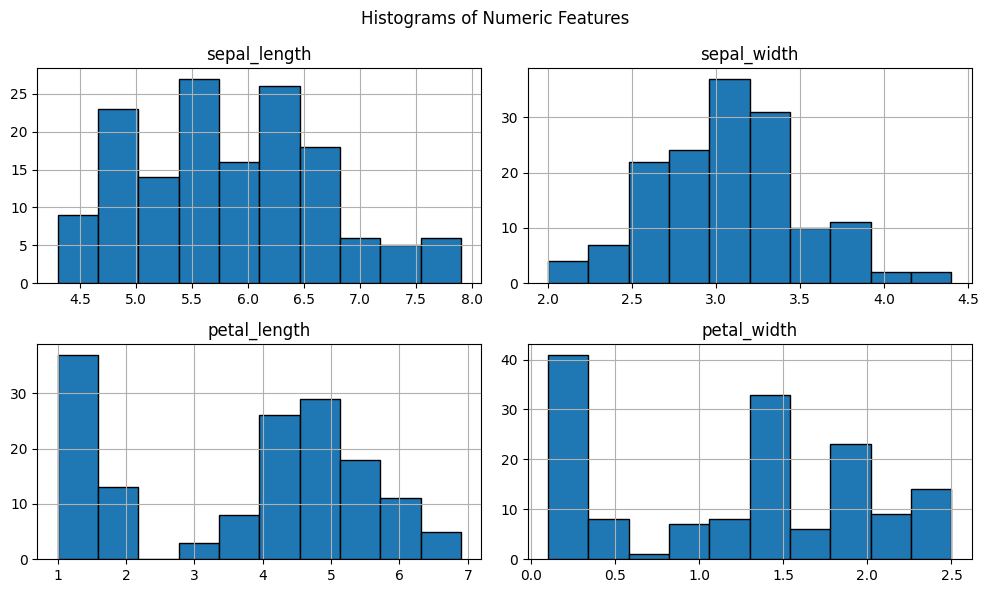

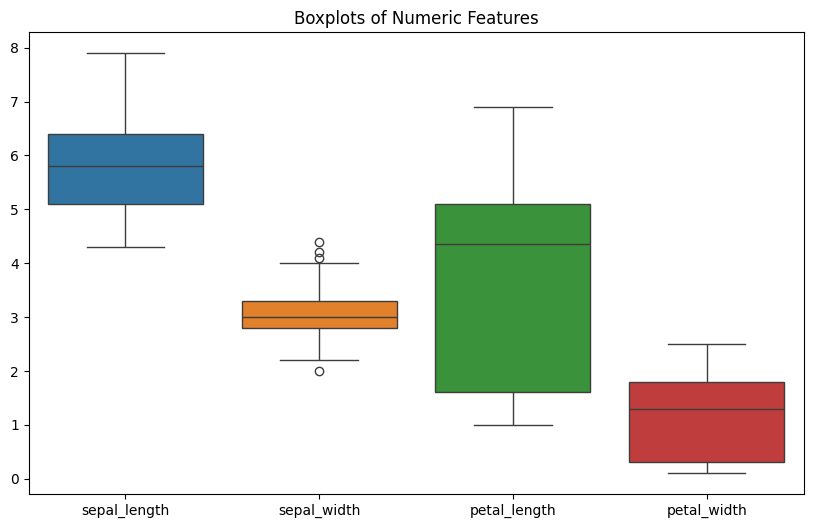

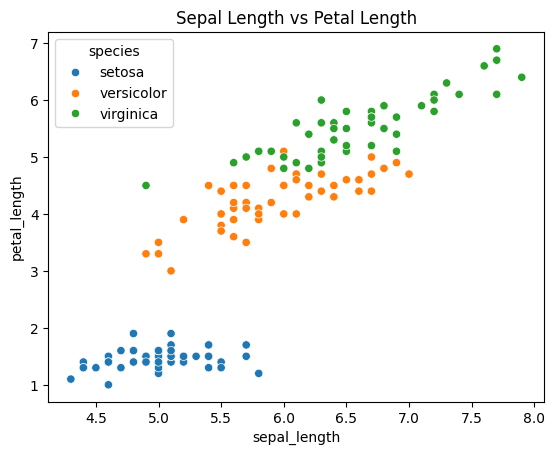

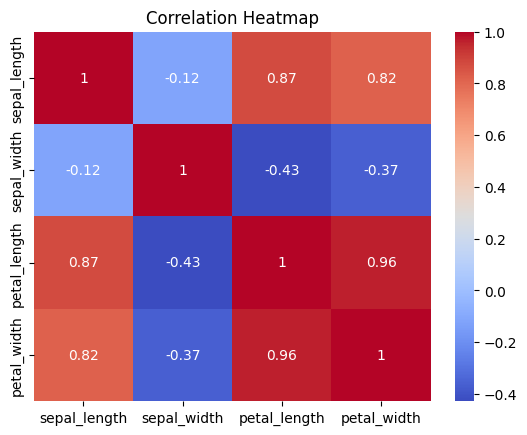

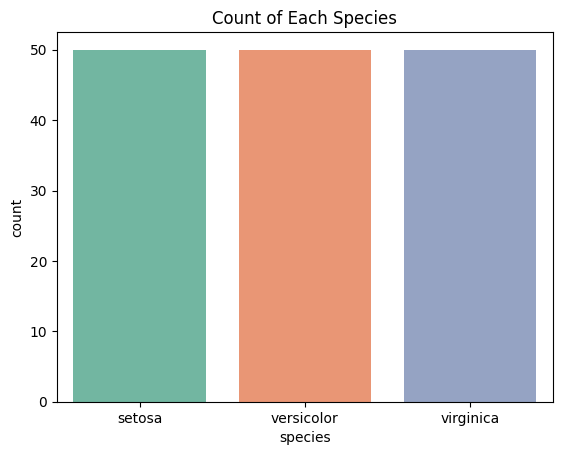

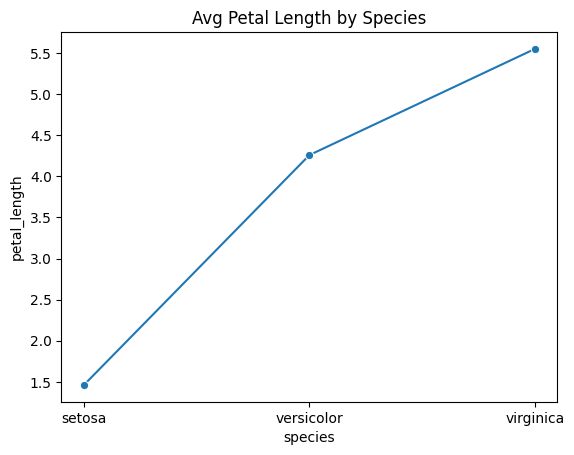

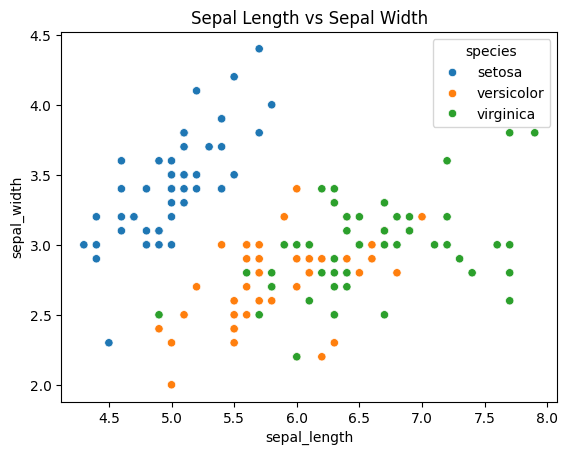

In [ ]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Load dataset
df = sns.load_dataset("iris")  # or use your CSV file

# 3. Define numeric columns
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 4. Create folder to save plots
os.makedirs("plots", exist_ok=True)

# 5. Histograms
df[num_cols].hist(figsize=(10, 6), edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.savefig("plots/histograms.png")
plt.show()

# 6. Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots of Numeric Features')
plt.savefig("plots/boxplots.png")
plt.show()

# 7. Scatter: Sepal vs Petal Length
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.savefig("plots/scatter_sepal_petal.png")
plt.show()

# 8. Correlation Heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("plots/correlation_heatmap.png")
plt.show()

# 9. Bar Plot: Species Count (Fixed)
sns.countplot(x='species', hue='species', data=df, palette='Set2', legend=False)
plt.title('Count of Each Species')
plt.savefig("plots/species_barplot.png")
plt.show()

# 10. Line Chart: Avg Petal Length by Species
avg_petal = df.groupby('species')['petal_length'].mean().reset_index()
sns.lineplot(x='species', y='petal_length', data=avg_petal, marker='o')
plt.title('Avg Petal Length by Species')
plt.savefig("plots/line_avg_petal_length.png")
plt.show()

# 11. Scatter: Sepal Length vs Sepal Width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.savefig("plots/scatter_sepal_length_width.png")
plt.show()

# 3. Regression Analysis (Sepal Length vs Petal Length)


🔹 Linear Regression Results:
Intercept: -7.309697918283384
Coefficient: 1.885871739325272
MSE: 0.8538
R² Score: 0.7083


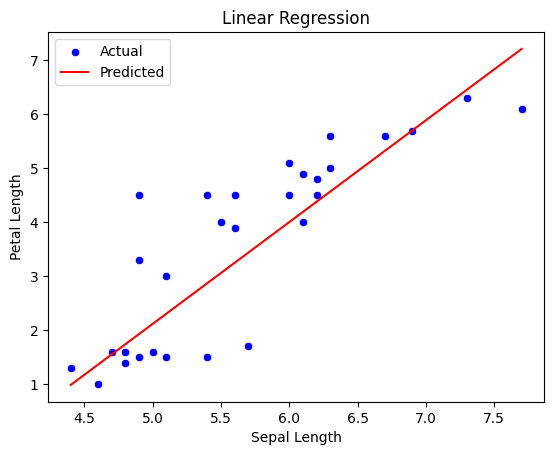

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features
X = df[['sepal_length']]
y = df['petal_length']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\n🔹 Linear Regression Results:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# Regression plot
sns.scatterplot(x=X_test['sepal_length'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['sepal_length'], y=y_pred, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

# 4. Time Series Analysis (Stock Prices)

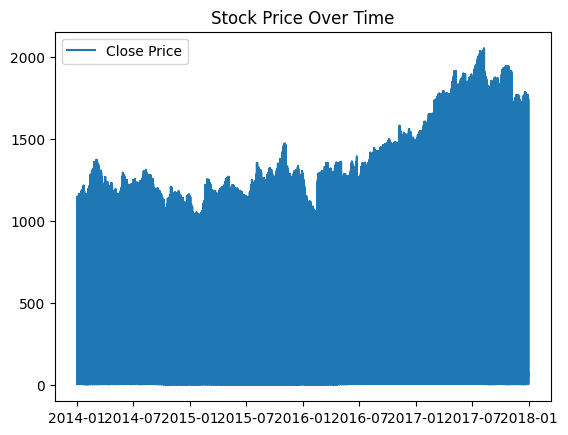

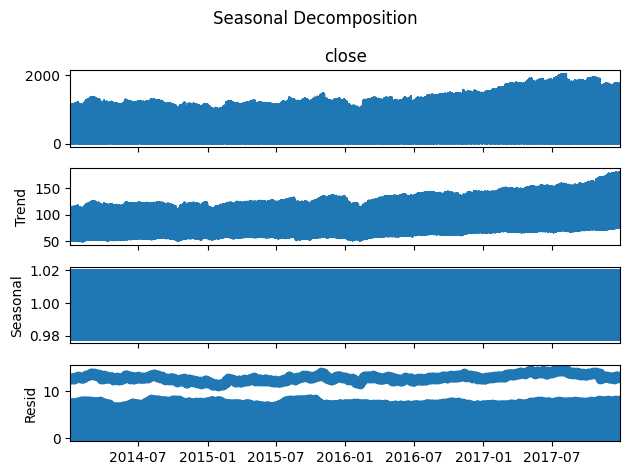

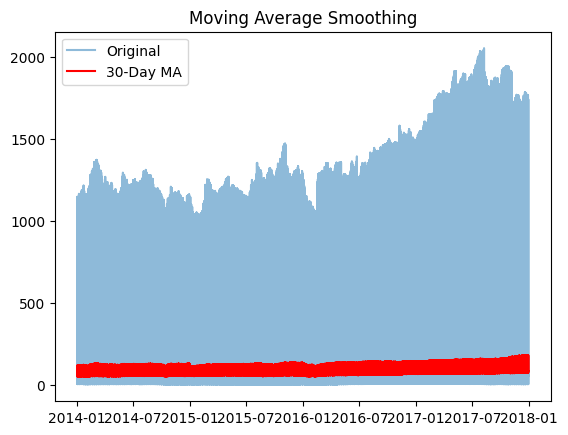

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Load stock data
stock_df = pd.read_csv(r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\2) Stock Prices Data Set.csv")
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.set_index('date', inplace=True)

# Plot original time series
plt.plot(stock_df['close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

# Decomposition
decomp = seasonal_decompose(stock_df['close'], model='multiplicative', period=30)
decomp.plot()
plt.suptitle("Seasonal Decomposition")
plt.tight_layout()
plt.show()

# 30-day Moving Average
stock_df['Moving_Avg'] = stock_df['close'].rolling(window=30).mean()
plt.plot(stock_df['close'], label='Original', alpha=0.5)
plt.plot(stock_df['Moving_Avg'], label='30-Day MA', color='red')
plt.legend()
plt.title("Moving Average Smoothing")
plt.show()

# 5. K-Means Clustering (Iris Data)

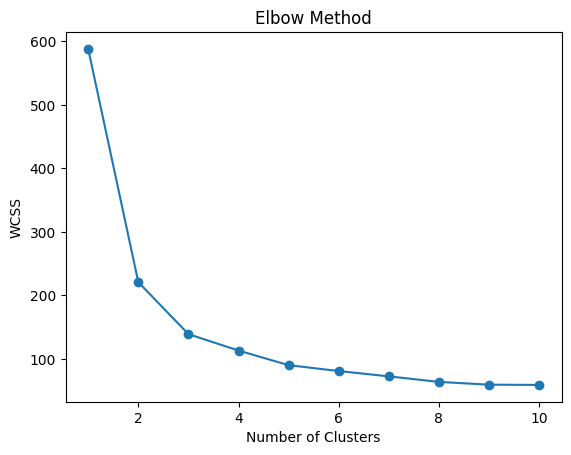

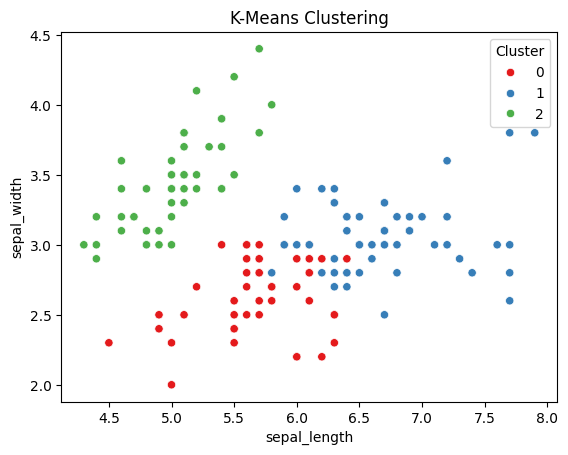

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_cols])

# Elbow Method
wcss = [KMeans(n_clusters=i, random_state=42).fit(scaled_features).inertia_ for i in range(1, 11)]
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster Plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

# 6. Classification Models with Hyperparameter Tuning


Logistic Regression Performance:
Accuracy: 0.9333333333333333
F1 Score: 0.9333333333333333
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Decision Tree Performance:
Accuracy: 0.9666666666666667
F1 Score: 0.9666666666666667
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Random Forest Performance:
Accuracy: 0.93

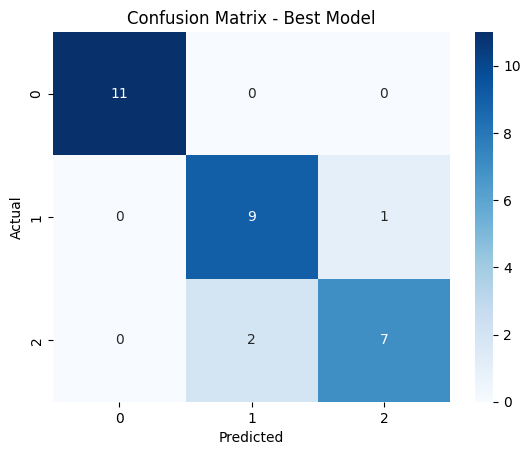

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Train/test split
X = df[num_cols]
y = df['species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Report:\n", classification_report(y_test, y_pred))

# Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train_scaled, y_train)
best_rf = grid.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test_scaled)
print("\nBest RF Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()